# Correlation of Carbon Emissions and Tree Cover Loss in the USA

Cecily Sperber  
Libby Prince  
Brandon Pizer

# Abstract

Our study investigates the relationship between atmospheric carbon dioxide (CO₂) concentrations and tree cover loss in the United States from 2001 to 2016. Forests are essential carbon sinks, and their degradation can significantly influence greenhouse gas levels. While fossil fuel combustion is the dominant source of CO₂ emissions, deforestation is a critical but often underexamined contributor. Using datasets from NOAA and Global Forest Watch, we conducted exploratory data analysis and statistical testing to assess whether annual variations in U.S. tree cover loss correlate with changes in atmospheric CO₂ levels. The data were cleaned, aggregated, and joined to align temporally. Visualizations and Pearson correlation analysis were used to identify patterns, while Shapiro-Wilk tests assessed data normality. Although global carbon mixing limits the precision of attributing national forest loss to atmospheric CO₂ changes, this project provides an important exploratory step in understanding the potential climate impact of deforestation within the U.S. Findings from this analysis may inform future research and support the case for forest conservation as part of national climate strategies.

# Introduction

Climate change is one of the most pressing global issues of the 21st century. While there are many causes, the rise in carbon dioxide (CO₂) in the atmosphere is known to be the main driver of human-caused climate change. Carbon dioxide is a greenhouse gas, meaning it traps heat in the atmosphere. This leads to warmer global temperatures, changes in weather patterns, and rising sea levels. To understand these impacts, scientists study the carbon cycle, especially the role of forests, which act as a natural carbon sink by absorbing CO₂. @pan2011large states when forests are destroyed or degraded, their ability to absorb carbon is reduced, and often, carbon is sent back into the atmosphere. This project examines the connection between carbon dioxide emissions and tree cover loss in the United States from 2001 to 2016. We focus on whether yearly forest loss is related to changes in CO₂ levels in the atmosphere. The goal is to better understand how deforestation affects the carbon balance in a country that significantly influences global emissions and

# Background

Deforestation and forest degradation are major contributors to climate change because they release carbon stored in trees. Forests serve as vital carbon sinks, according to @bastin2019global sequestering CO₂ from the atmosphere through photosynthesis). When trees are cut down, burned, or otherwise destroyed, this stored carbon is released into the atmosphere, contributing to the greenhouse effect and rising global temperatures states @curtis2018classifying. As one of the top carbon-emitting countries, the United States has a responsibility to mitigate emissions through land management and forest conservation. Forest loss in the U.S. is driven by a combination of human activities and natural events. Factors such as logging, urban development, wildfires, and pests all contribute to annual changes in tree cover. These changes raise questions about whether losing forests in the U.S. clearly affects carbon dioxide levels in the air. While fossil fuel combustion is the primary source of U.S. emissions, the impact of land use change, including deforestation, is often overlooked in national climate discussions. Understanding the relationship between forest cover and CO₂ is important for evaluating the climate impacts of land-use decisions. With its extensive and diverse forest ecosystems, the U.S. has the potential to reduce emissions and increase carbon storage through conservation and reforestation efforts. Monitoring cover loss and how it affects carbon levels is important so we can create better climate policies and reach national climate goals.

# Motivation

The United States is one of the world’s largest carbon emitters and large areas of forested land. Deforestation and land-use changes have contributed significantly to CO₂ emissions, making up about a third of global emissions from 1750 to 2011 and 12% between 2000 and 2009 according to @adopted2014climate. In the U.S., the climate effects of forest loss are often less noticeable or prioritized than in tropical regions. While deforestation in areas like the Amazon is a major focus in global environmental discussions, the impact of forest loss in the U.S. is less frequently studied. This project aims to explore how forest loss in the U.S. influences CO₂ emissions and the country’s carbon balance. This study is motivated to better understand how U.S. forest ecosystems affect the carbon cycle and how protecting forests can help mitigate climate change. Understanding the effects of land-use change is essential to achieving greenhouse gas reduction goals. If strong correlations are found between tree cover loss and CO₂ levels, it could support the case for forest conservation policies and nature-based solutions like reforestation and improved forest management. Additionally, this research adds to the growing evidence that forests act as important carbon sinks. Forest conservation not only helps reduce emissions but also offers benefits like protecting biodiversity, managing water, and supporting ecosystem services. By analyzing the effects of forest loss on the U.S. carbon cycle, this study aims to develop more effective conservation strategies and climate policies that effectively address both immediate and long-term environmental challenges.

**Necessary Packages**

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──
✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.2.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()

# Data

For our project, we worked with two datasets: one containing carbon emissions data and another with tree cover loss data. Below, we describe the origin, cleaning, and manipulation of the data, followed by three visualizations that help us explore potential patterns We used global atmospheric carbon dioxide (CO₂) data from the National Oceanic and Atmospheric Administration (NOAA) @noaa_co2_2025. This dataset included monthly values of CO₂ concentrations, specifically the “Seasonally Adjusted CO2 Fit (ppm)” column. And for the Tree Cover Loss Data we collected the dataset from Global Forest Watch @gfw_tcl_2025 and it includes worldwide estimates of annual forest cover in hectares.

In [ ]:
carbon_data <- read_csv("data/carbon.csv")

Rows: 720 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): Year, Month, Decimal Date, Carbon Dioxide (ppm), Seasonally Adjuste...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 4571 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): iso
dbl (2): year, loss__ha

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

# Methods

This project uses a combination of data cleaning, visualization, and basic statistical analysis to examine the relationship between carbon dioxide concentrations and tree cover loss in the United States from 2001 to 2016. The primary goal is to assess whether a measurable correlation exists between annual CO₂ levels and the amount of tree cover lost in the same years. After joining the datasets, separate plots are created for carbon dioxide and tree loss individually, and then a dual-axis plot is designed to observe both variables together. This visual comparison helps identify whether the patterns in CO₂ levels and tree loss appear to be linked in any consistent way over time. To evaluate the relationship statistically, a correlation analysis (e.g., Pearson correlation coefficient) and a Shapiro test will be conducted. One potential challenge is that carbon dioxide concentrations reflect global atmospheric conditions, not just emissions or carbon sinks within the United States. While the CO₂ dataset is valuable and accurate, it may not respond exclusively to tree cover loss in the U.S., especially given the global nature of carbon mixing in the atmosphere. This could obscure the direct correlation between U.S. forest loss and atmospheric CO₂ levels. Additionally, the tree cover loss data does not distinguish between temporary and permanent loss. Some tree loss may be due to natural events or sustainable forestry practices followed by replanting, meaning the carbon released is not necessarily permanent. Without knowing the context of each year’s tree loss, it is difficult to estimate the true carbon impact of those changes. The correlation and regression methods used in this project are relatively simple and cannot account for complex interactions between multiple climate and land use variables. For example, CO₂ levels are influenced by a wide range of factors, including industrial activity, transportation, and ocean absorption, not just forest loss. Therefore, a statistically significant correlation between the two variables does not prove causation, and results must be interpreted carefully. Furthermore, the 15-year time frame provides a limited number of data points (n = 16), which can reduce statistical power and make it more difficult to detect subtle trends. If the relationship is weak or non-linear, more advanced time-series analysis or larger datasets may be needed to fully understand the dynamics at play. Despite the limitations, the selected methods are well-suited for the initial goals of this project. The use of line graphs and dual-axis plots allows for a clear visual comparison of two key environmental indicators, while the correlation coefficient provides a first step toward understanding whether a statistical relationship exists. The scale of the data is also well-suited for the correlation analysis. These approaches are appropriate for an exploratory study and can help guide further questions or more complex modeling if a clear pattern is observed. Ultimately, the goal of this analysis is not to claim a definitive causal link but to explore whether patterns in forest loss and carbon emissions are moving together in a way that supports further investigation. If a strong correlation is found, it could support the argument that U.S. forest protection is an important component of national climate strategies. If no correlation is found, that result is still valuable in showing the complexity of climate systems and the importance of using multi-factor analysis in environmental research.

# Data Cleaning

To clean the tree cover loss data we filtered the dataset to include only rows where the country code (iso) was “USA”. Then we also filtered for the same time period, 2001–2016, to match the carbon data. Lastly, only relevant columns were kept; year and loss\_\_ha (tree cover loss in hectares).

In [ ]:
library(tidyverse)
library(tidymodels)
library(usethis)

# Tree Data
cleaned_tree_data <- treecover_data %>%
  filter(iso == "USA", year >= 2001, year <= 2016)

head(cleaned_tree_data)

# A tibble: 6 × 3
  iso    year loss__ha
  <chr> <dbl>    <dbl>
1 USA    2001 1943319.
2 USA    2002 2038436.
3 USA    2003 1649384.
4 USA    2004 2746257.
5 USA    2005 2691544.
6 USA    2006 2605856.

To clean the carbon dataset we removed unnecessary columns and kept only Year, Month, and Seasonally Adjusted CO2 Fit (ppm). We also filtered the data to include only the years from 2001 to 2016. Then we grouped the monthly values by year and calculated the annual average CO₂ level to simplify the analysis.

In [ ]:
# Carbon Data
cleaned_carbon_data <- carbon_data |>
  select(year = Year, Month, CO2 = `Seasonally Adjusted CO2 Fit (ppm)`) |>
  filter(year >= 2001, year <= 2016) |>
  group_by(year) |>
  summarise(Yearly_Mean = mean(CO2), na.rm = TRUE) |>
  ungroup()

# Joining Data

In [ ]:
joined_data <- inner_join(cleaned_carbon_data, cleaned_tree_data, by = "year")
view(joined_data)

# Shaprio Test

In [ ]:
shapiro_co2 <- shapiro.test(joined_data$Yearly_Mean)
shapiro_tree <- shapiro.test(joined_data$loss__ha)

shapiro_co2


    Shapiro-Wilk normality test

data:  joined_data$Yearly_Mean
W = 0.971, p-value = 0.8545


    Shapiro-Wilk normality test

data:  joined_data$loss__ha
W = 0.93401, p-value = 0.282

# Correlation Test

In [ ]:
cor.test(joined_data$Yearly_Mean, joined_data$loss__ha, method = "pearson")


    Pearson's product-moment correlation

data:  joined_data$Yearly_Mean and joined_data$loss__ha
t = -0.7376, df = 14, p-value = 0.4729
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6288267  0.3343514
sample estimates:
       cor 
-0.1934096 

# Plot Carbon Data

ℹ Please use `linewidth` instead.

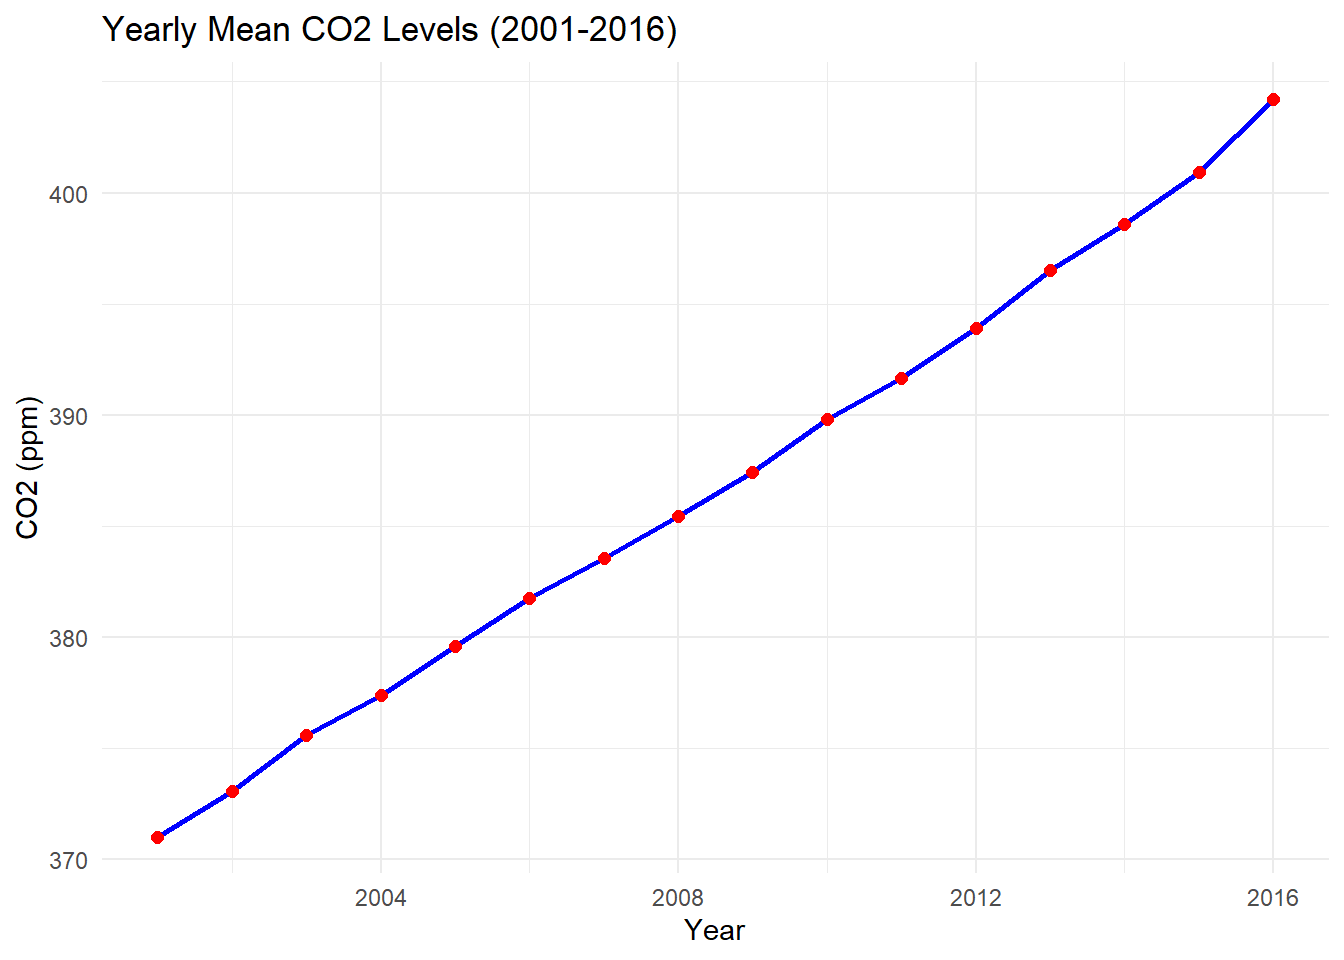

In [ ]:
ggplot(cleaned_carbon_data, aes(x = year, y = Yearly_Mean)) +
  geom_line(color = "blue", size = 1) +  
  geom_point(color = "red", size = 2) + 
  labs(
    title = "Yearly Mean CO2 Levels (2001-2016)",
    x = "Year",
    y = "CO2 (ppm)"
  ) +
  theme_minimal()

## Graph 1: Yearly Mean CO₂ Levels (2001–2016)

Graph 1 displays the average annual CO₂ concentration in the atmosphere over time. A clear upward trend highlights the increase in emissions over the selected years.

# Plot Tree Data

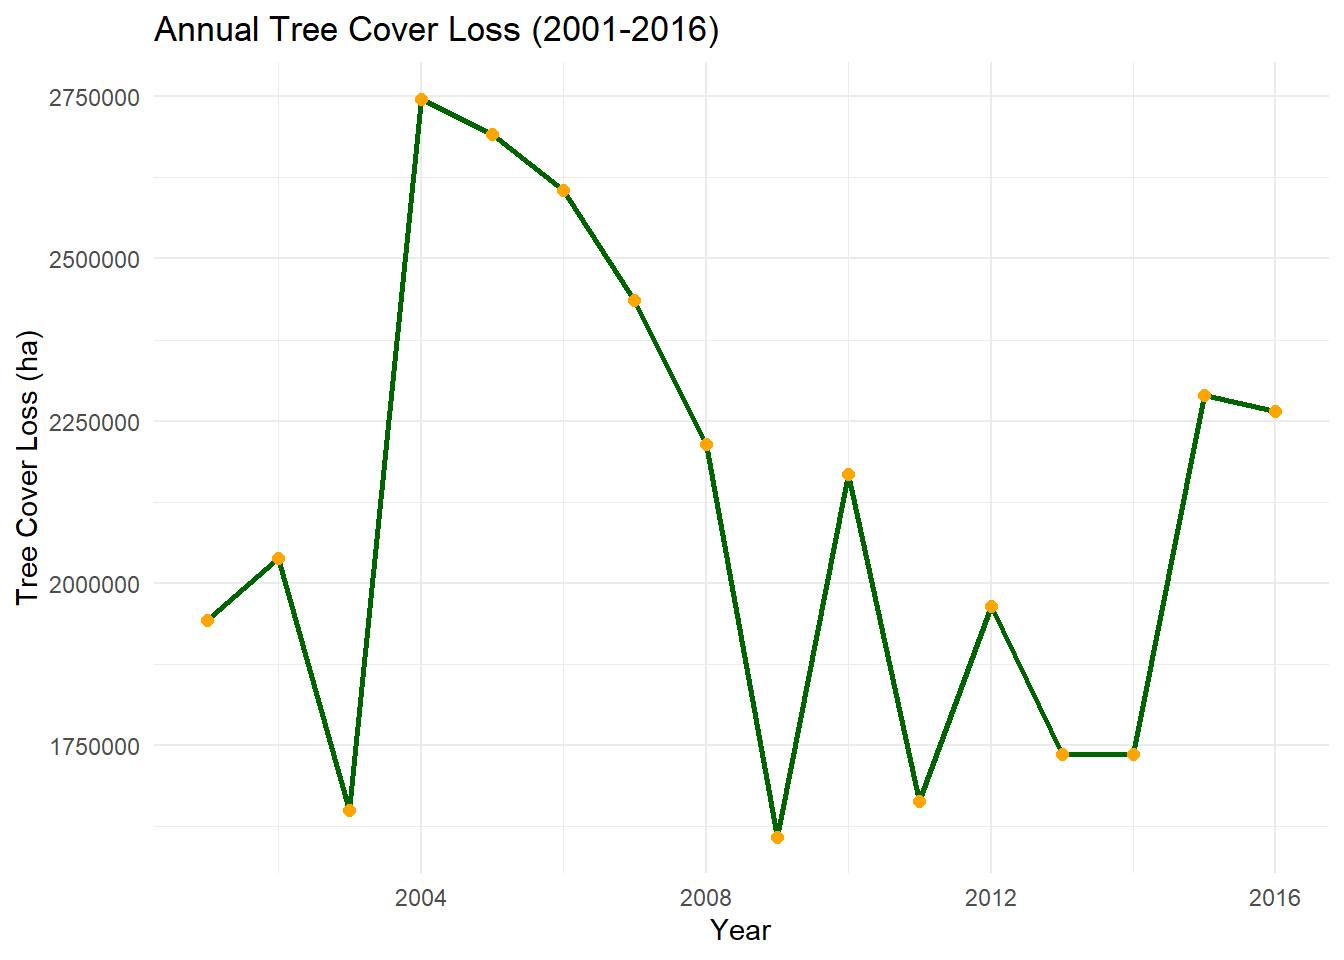

In [ ]:
ggplot(joined_data, aes(x = year, y = loss__ha)) +
  geom_line(color = "darkgreen", size = 1) +  
  geom_point(color = "orange", size = 2) +  
  labs(
    title = "Annual Tree Cover Loss (2001-2016)",
    x = "Year",
    y = "Tree Cover Loss (ha)"
  ) +
  theme_minimal()  

## Graph 2: Annual Tree Cover Loss in the USA (2001–2016)

Graph 2 shows how tree cover loss has varied across the same time period. Peaks in certain years may indicate significant deforestation events or natural disturbances such as wildfires or storms.

# Plot Tree Loss and Carbon

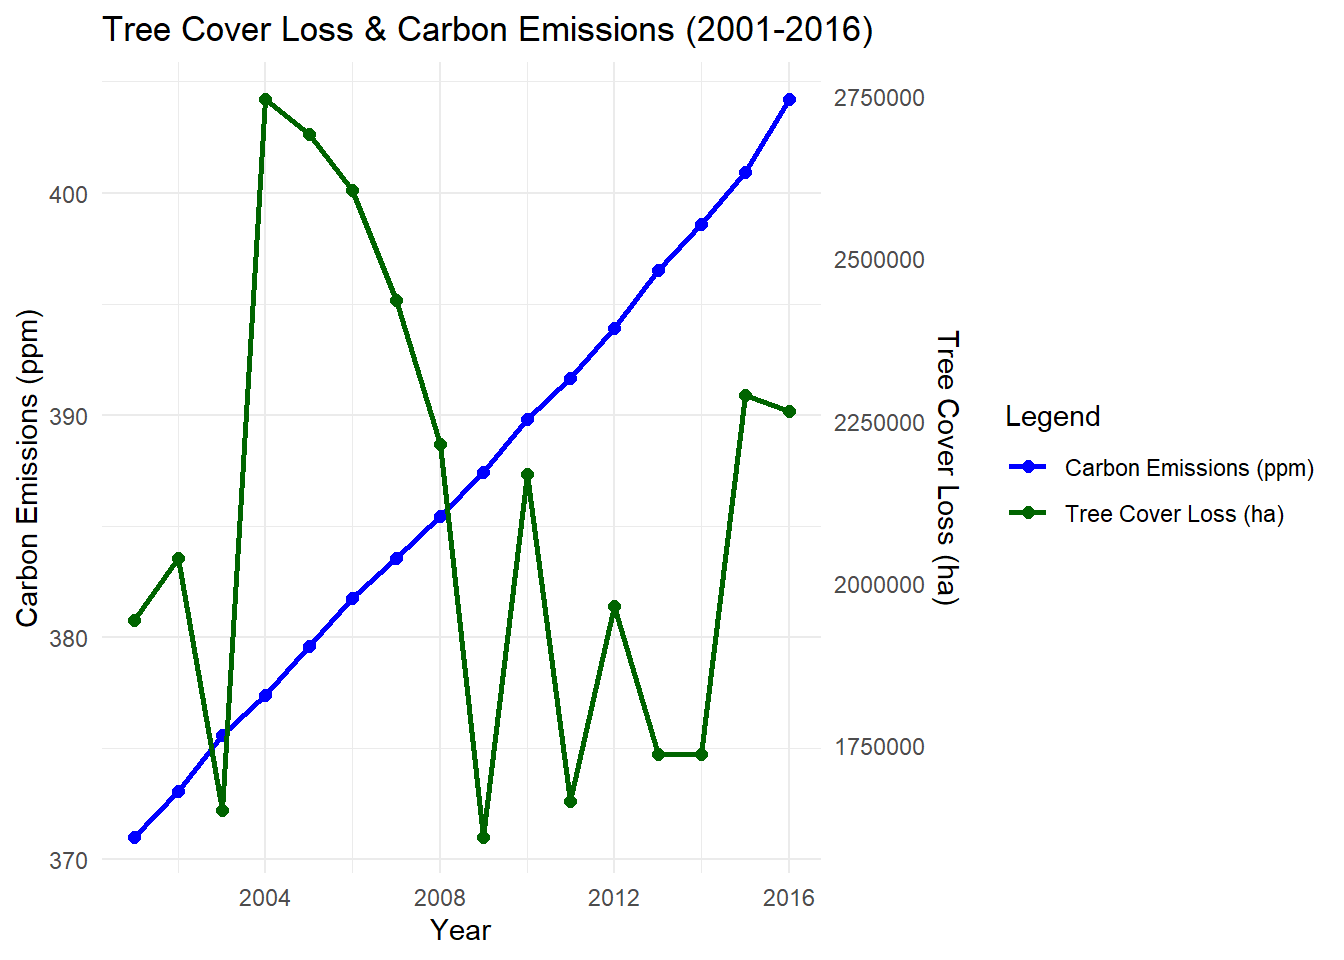

In [ ]:
library(scales) 

plot_data <- joined_data %>%
  select(year, Yearly_Mean, loss__ha) %>%
  pivot_longer(cols = c(Yearly_Mean, loss__ha), 
               names_to = "Variable", 
               values_to = "Value")

joined_data <- joined_data %>%
  mutate(scaled_loss = rescale(loss__ha, to = range(Yearly_Mean, na.rm = TRUE)))

ggplot() +
  geom_line(data = joined_data, aes(x = year, y = Yearly_Mean, color = "Carbon Emissions (ppm)"), size = 1) +
  geom_point(data = joined_data, aes(x = year, y = Yearly_Mean, color = "Carbon Emissions (ppm)"), size = 2) +
  geom_line(data = joined_data, aes(x = year, y = scaled_loss, color = "Tree Cover Loss (ha)"), size = 1) +
  geom_point(data = joined_data, aes(x = year, y = scaled_loss, color = "Tree Cover Loss (ha)"), size = 2) +
  scale_y_continuous(
    name = "Carbon Emissions (ppm)", 
    sec.axis = sec_axis(~rescale(., from = range(joined_data$Yearly_Mean, na.rm = TRUE), 
                                    to = range(joined_data$loss__ha, na.rm = TRUE)), 
                        name = "Tree Cover Loss (ha)")
  ) +
  scale_color_manual(values = c("Carbon Emissions (ppm)" = "blue", "Tree Cover Loss (ha)" = "darkgreen")) +
  labs(
    title = "Tree Cover Loss & Carbon Emissions (2001-2016)",
    x = "Year",
    color = "Legend"
  ) +
  theme_minimal()

## Graph 3: Correlation of Tree Cover Loss and CO₂ Emissions (2001-2016)

Graph 3 explores the potential relationships between forest loss and atmospheric carbon levels. We created a dual-axis graph for both tree cover loss (scaled to match the range of CO₂) and CO₂ levels which are plotted together by year. This visualization helps us visually assess whether higher deforestation years might be associated with increased carbon emissions.

# Results

## Shapiro Wilk Normality Test

Atmospheric CO₂ concentration data did not significantly deviate from a normal distribution (W = 0.971, p = 0.8545), indicating that the assumption of normality was met. This supports the use of parametric tests like Pearson’s correlation when analyzing the relationship between CO₂ and tree cover loss.

## Pearson’s Correlation Test

There was a slight, non-significant negative relationship between tree cover loss and atmospheric CO₂ levels in the U.S. from 2001 to 2016 (r = –0.193, t(14) = –0.74, p = 0.473, 95% CI: –0.63 to 0.33). This suggests that, while a slight negative correlation exists, it is not strong enough to support a significant relationship between deforestation and CO₂ emissions. Other factors likely play a more significant role in driving CO₂ trends during this period

# Discussion and Conclusion

The primary objective of this study was to investigate whether a relationship exists between atmospheric CO₂ concentrations and tree cover loss in the United States from 2001 to 2016. According to @houghton2018negative, forest growth provides negative emissions on carbon. We hypothesized that greater tree cover loss would correlate with increased atmospheric CO₂ levels, given that deforestation reduces the capacity of forests to sequester carbon, potentially contributing to elevated CO₂ concentrations. @li2022deforestation believes drofestation driven climate change is much higher than fossil fuel emissions. Although the statistical analysis did not reveal a significant relationship between tree cover loss and atmospheric CO₂ levels, the visual representation of the data suggests a potential trend. Specifically, the graph showed increased tree cover loss in 2004 and a decline in 2008, while CO₂ levels continued to rise steadily throughout the study period. This may imply a visual correlation; however, as @oneill2009burningembers argues, climate change visualizations can carry connotative meanings that may misrepresent the actual data relationships. In our case, although the visual might suggest an association, the lack of statistical significance indicates that the observed pattern is not robust enough to support a definitive conclusion. Several factors may explain the discrepancy between the visual trend and the statistical findings. One plausible explanation is that the scale of tree cover loss within the U.S. was insufficient to produce a detectable impact on national CO₂ concentrations. Furthermore, other dominant sources of carbon emissions—such as fossil fuel combustion, industrial processes, and transportation—likely played a much larger role in driving atmospheric CO₂ levels during this timeframe. It is also important to recognize that atmospheric CO₂ reflects cumulative global emissions and responds to long-term trends. Consequently, tree cover loss in a single country over a 15-year period may not produce an immediate or measurable effect on global CO₂ concentrations. @houghton2003revised emphasizes that uncertainties in estimating carbon flux are often influenced by variations in deforestation rates and the inherent challenges of accurately measuring land-use changes. These uncertainties contribute to inconsistencies in global carbon flux models and complicate efforts to establish a direct relationship between tree cover loss and CO₂ concentrations, particularly at regional scales. Future research could benefit from extending the temporal scope of the analysis, incorporating higher-resolution regional data, and accounting for additional variables such as reforestation efforts, fossil fuel consumption, and land management practices. Such comprehensive approaches would enhance our understanding of the complex interactions between deforestation and atmospheric CO₂ dynamics.

# References